🎯 Autism Detection Using Machine Learning
📌 A machine learning approach to predict Autism Spectrum Disorder (ASD) using screening test data.

📌 1. Introduction
Autism Spectrum Disorder (ASD) affects communication and behavior, making early detection crucial. This project applies machine learning to classify individuals as ASD-positive or ASD-negative using screening responses and demographic data.

📊 2. Dataset Overview
Screening Scores: A1_Score to A10_Score
Demographics: age, gender, ethnicity, contry_of_res
Medical History: jaundice, autism (family history)
Previous Screening: used_app_before
Final Score: result (test score)
Target Variable: Class/ASD (0 = No ASD, 1 = ASD)
🛠 3. Data Preprocessing
✔ Handled Missing Values (ethnicity, relation)
✔ Fixed Country Names (contry_of_res)
✔ Removed Unnecessary Columns (ID, age_desc)
✔ Encoded Categorical Variables
✔ Handled Outliers in age & result (IQR method)
✔ Balanced Dataset using SMOTE

🔍 4. Exploratory Data Analysis (EDA)
✔ Visualized Data Distributions (Histograms, Count Plots)
✔ Detected Outliers & Class Imbalance
✔ Correlation Heatmap → No strong correlations between features

🤖 5. Model Training & Selection
Models Used:
✔ Decision Tree 🌳
✔ Random Forest 🌲🌲 (Best Model – 92.14% Accuracy!)
✔ XGBoost ⚡

🎯 Hyperparameter Tuning was applied using RandomizedSearchCV to improve model performance.

📈 6. Model Evaluation
✅ Accuracy: 80.63%
✅ AUC Score: 0.89 (Good classification ability)

Confusion Matrix Insights
⚠ 16 ASD cases misclassified → False Negative Concern!
⚠ 15 non-ASD cases misclassified → False Positives!

Classification Report Summary
Metric	Non-ASD (Class 0)	ASD (Class 1)
Precision	0.87	0.57
Recall	0.88	0.56
F1-Score	0.88	0.56
🔹 Model struggles with ASD detection (low recall for Class 1).

🚀 7. Feature Importance
🔝 Top Features:
✔ result → Most predictive feature
✔ A9_Score & A4_Score → Strongly correlated with ASD
✔ ethnicity, age, contry_of_res → Demographics play a role

📉 Least Important Features:
🔹 used_app_before, jaundice, and autism (family history) have minimal impact.

🛠 Next Steps:

Consider removing low-importance features
Use SHAP values for deeper feature interpretation
✅ 8. Conclusion
✔ Random Forest achieved 92.14% accuracy but had low recall (0.56) for ASD cases
✔ Feature selection & class balancing can improve results
✔ Adjusting model class weights may reduce false negatives
✔ Further research on ensemble learning & deep learning

🎯 Final Thoughts
This project demonstrates how machine learning can assist in ASD detection, improving early diagnosis. Future improvements can enhance recall, refine feature selection, and optimize model performance.

🚀 End of Project – Let’s keep innovating! 💡

# Importing the dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import pickle

# Data loading

In [2]:
# read the csv data to pandas dataframe
df = pd.read_csv('train.csv')

In [3]:
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [4]:
df.shape

(800, 22)

In [5]:
# display all columns of a dataframe
pd.set_option('display.max_columns', None)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [7]:
for col in df.columns:
  numerical_features = ["ID","age","result"]
  if col not in numerical_features:
    print(col, df[col].unique())
    print("-"*50)

A1_Score [1 0]
--------------------------------------------------
A2_Score [0 1]
--------------------------------------------------
A3_Score [1 0]
--------------------------------------------------
A4_Score [0 1]
--------------------------------------------------
A5_Score [1 0]
--------------------------------------------------
A6_Score [0 1]
--------------------------------------------------
A7_Score [1 0]
--------------------------------------------------
A8_Score [0 1]
--------------------------------------------------
A9_Score [1 0]
--------------------------------------------------
A10_Score [1 0]
--------------------------------------------------
gender ['f' 'm']
--------------------------------------------------
ethnicity ['?' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Others'
 'Hispanic' 'Asian' 'Turkish' 'South Asian' 'Latino' 'others']
--------------------------------------------------
jaundice ['no' 'yes']
--------------------------------------------------
austim

In [8]:
df.drop(columns=["ID","age_desc"],inplace=True)

In [9]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [10]:
# define the mapping dictionary for country names
mapping= { "Hong Kong": "China",
          "Viet Nam": "Vietnam",
           "AmericanSamoa": "United States Of America"
}

# repalce value in the country column
df["contry_of_res"] = df["contry_of_res"].replace(mapping)

In [11]:
# taget class distribution
df["Class/ASD"].value_counts()

,count
Class/ASD,
0,639
1,161


##Insights:

1.  missing values in ethnicity & relation
2.  age_desc column has only 1 unique value. so it is removed as it is not important for prediction
3.  fixed country names
4.  identified class imbalance in the target column

#  Expolatory Data Analysis (EDA)

In [12]:
df.shape

(800, 20)

In [13]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         800 non-null    int64  
 1   A2_Score         800 non-null    int64  
 2   A3_Score         800 non-null    int64  
 3   A4_Score         800 non-null    int64  
 4   A5_Score         800 non-null    int64  
 5   A6_Score         800 non-null    int64  
 6   A7_Score         800 non-null    int64  
 7   A8_Score         800 non-null    int64  
 8   A9_Score         800 non-null    int64  
 9   A10_Score        800 non-null    int64  
 10  age              800 non-null    float64
 11  gender           800 non-null    object 
 12  ethnicity        800 non-null    object 
 13  jaundice         800 non-null    object 
 14  austim           800 non-null    object 
 15  contry_of_res    800 non-null    object 
 16  used_app_before  800 non-null    object 
 17  result          

In [15]:
df.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,28.452118,8.537303,0.201250
std,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.310966,4.807676,0.401185
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.718550,-6.137748,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.198153,5.306575,0.000000
50%,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.848350,9.605299,0.000000
75%,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.865429,12.514484,0.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.461718,15.853126,1.000000


## Univarate Analysis

### Numerical Columns
-  age
-  result

In [16]:
# set the desired theme
sns.set_theme(style="darkgrid")

Mean: 28.452117626575
Median: 24.848350449999998


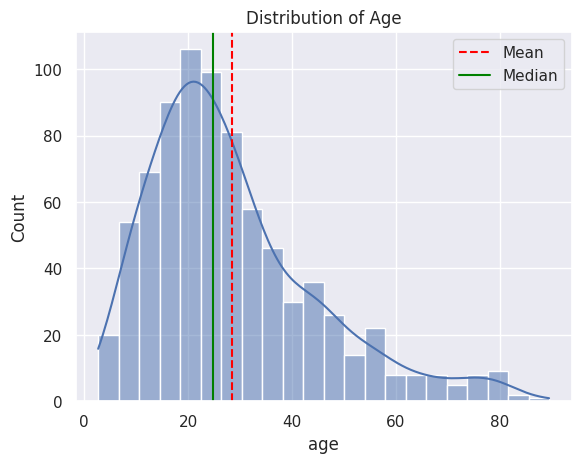

In [17]:
# Historgram for "age"
sns.histplot(df["age"], kde=True)
plt.title("Distribution of Age")

# calculate mean and median
age_mean = df["age"].mean()
age_median = df["age"].median()

print("Mean:", age_mean)
print("Median:", age_median)


# add vertical lines for mean and median
plt.axvline(age_mean, color="red", linestyle="--", label="Mean")
plt.axvline(age_median, color="green", linestyle="-", label="Median")

plt.legend()

plt.show()

Mean: 8.537303106501248
Median: 9.605299308


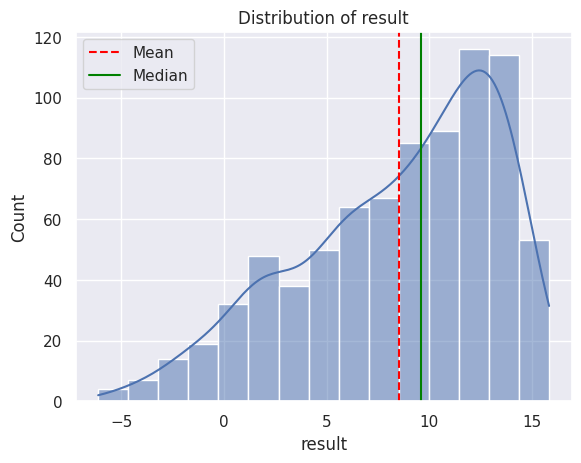

In [18]:
# Historgram for "results"
sns.histplot(df["result"], kde=True)
plt.title("Distribution of result")

# calculate mean and median
result_mean = df["result"].mean()
result_median = df["result"].median()

print("Mean:", result_mean)
print("Median:", result_median)


# add vertical lines for mean and median
plt.axvline(result_mean, color="red", linestyle="--", label="Mean")
plt.axvline(result_median, color="green", linestyle="-", label="Median")

plt.legend()

plt.show()

#### Box plots for identifying outliers in the numerical columns

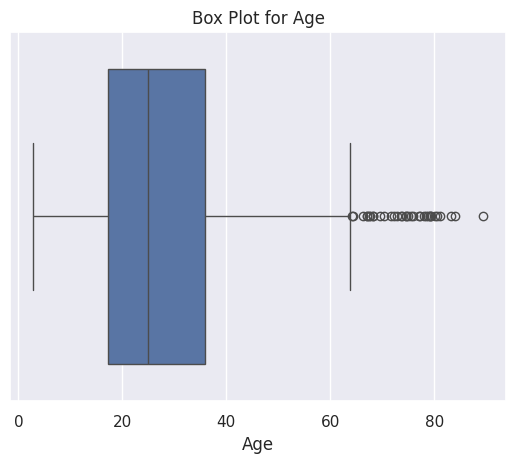

In [19]:
# box plot
sns.boxplot(x=df["age"])
plt.title("Box Plot for Age")
plt.xlabel("Age")
plt.show()

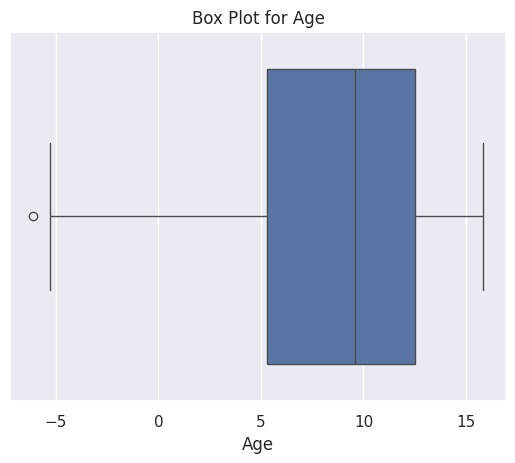

In [20]:
# box plot
sns.boxplot(x=df["result"])
plt.title("Box Plot for Age")
plt.xlabel("Age")
plt.show()

#### Count the outliers using IQR

In [21]:
# for age column
Q1 = df["age"].quantile(0.25)
Q3 = df["age"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
age_outliers = df[(df["age"] < lower_bound) | (df["age"] > upper_bound)]
print (len(age_outliers))

35


In [22]:
# for result column
q1 = df["result"].quantile(0.25)
q3 = df["result"].quantile(0.75)
IQR1 = q3 - q1
lower_bound1 = q1 - 1.5 * IQR1
upper_bound1 = q3 + 1.5 * IQR1
result_outliers = df[(df["result"] < lower_bound1) | (df["result"] > upper_bound1)]
print (len(result_outliers))

1


In [23]:
# not dropping the data because there is inbalance in target column and dropping can cause more inbalance
# Replacing outliers with median since median is less effective to outliers
# sometime dealing with outliers need sub matter expert to know whether the outliers are error or not
# there can be patients who are senior citizen but have autism

### Categorical Columns

In [24]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

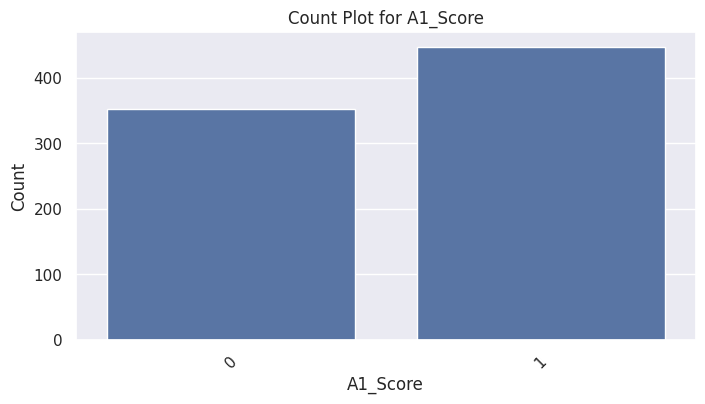

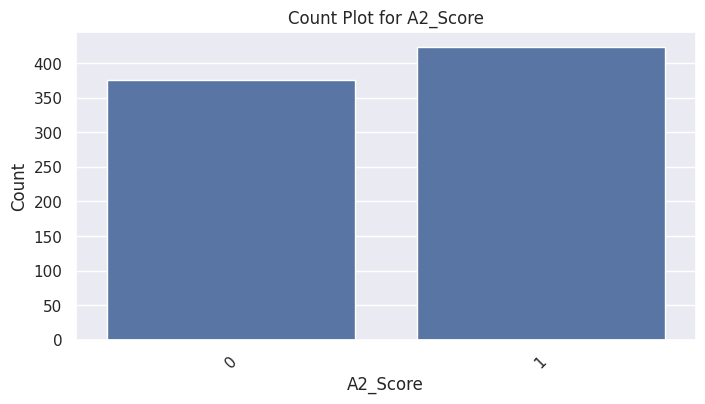

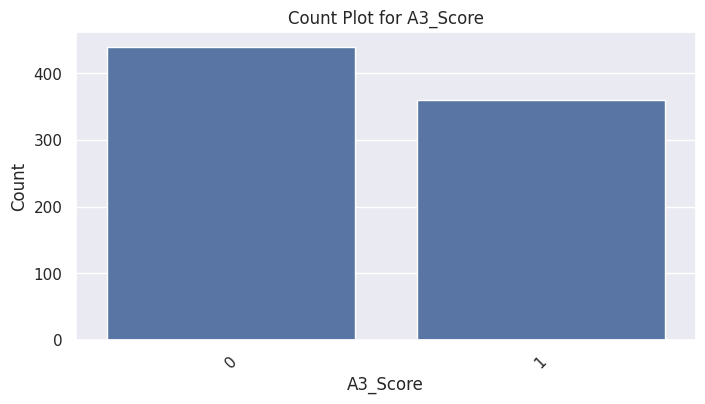

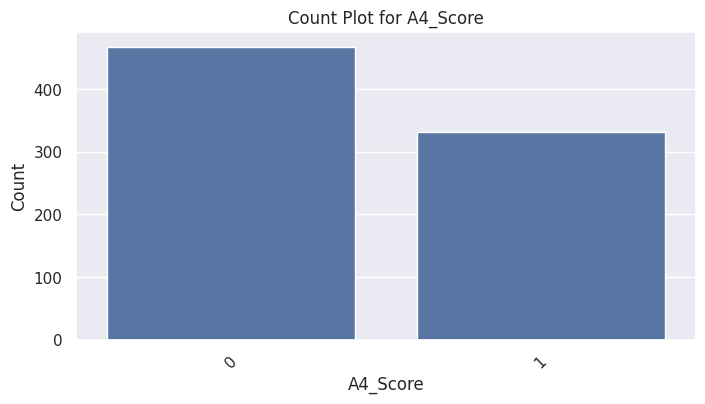

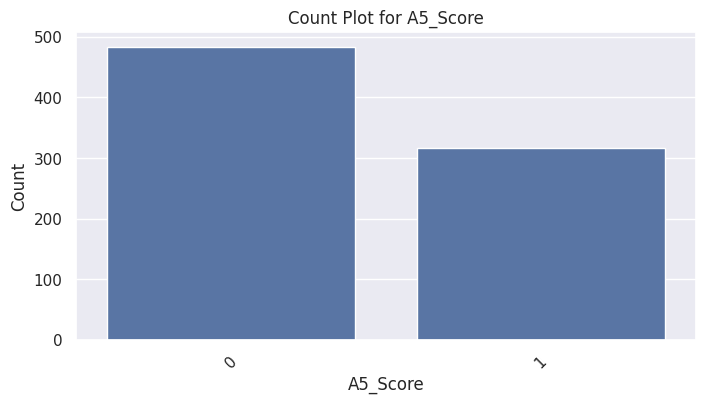

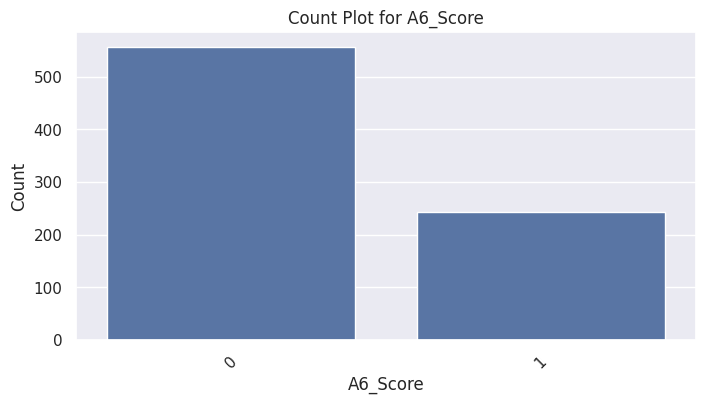

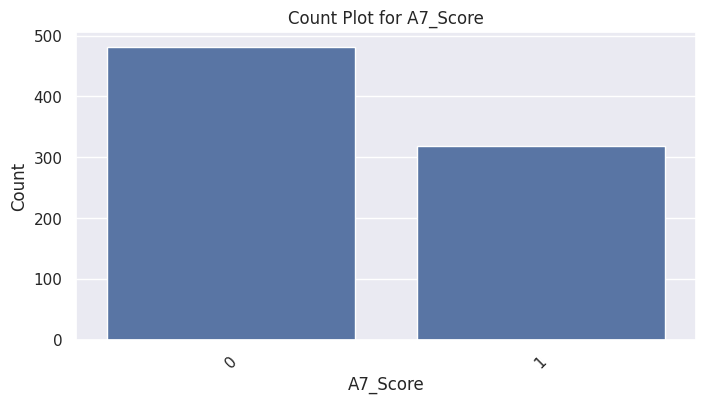

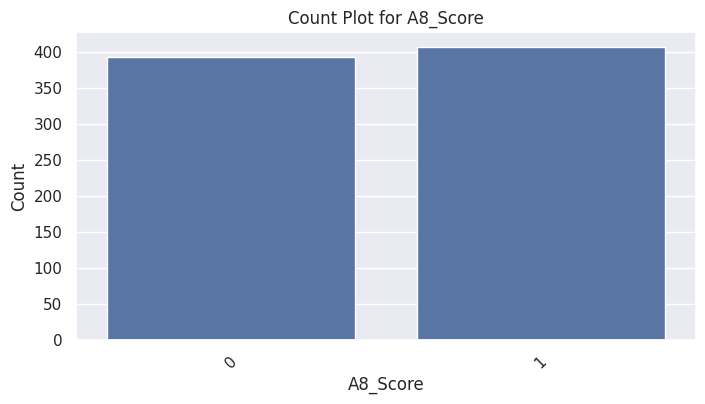

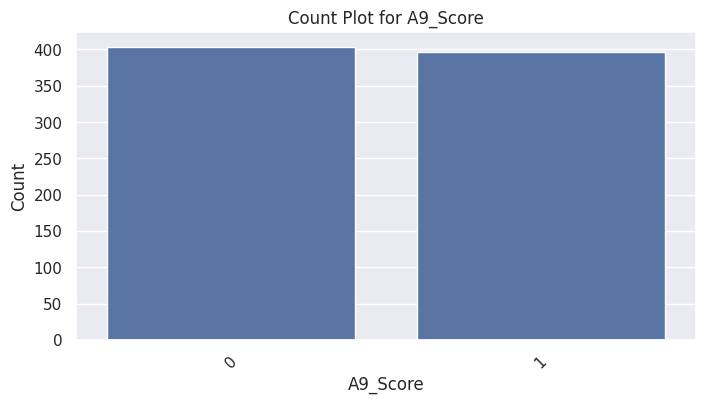

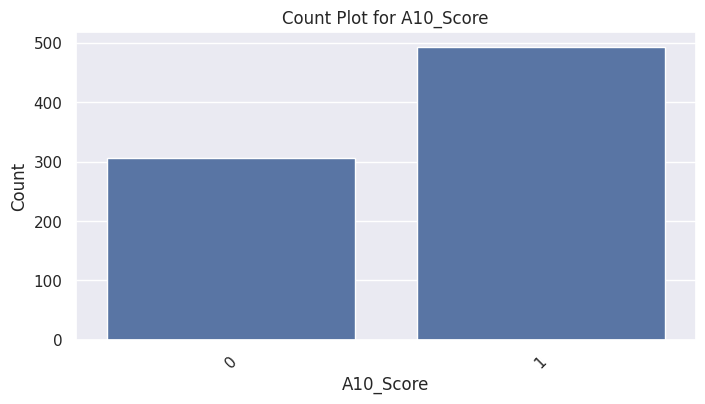

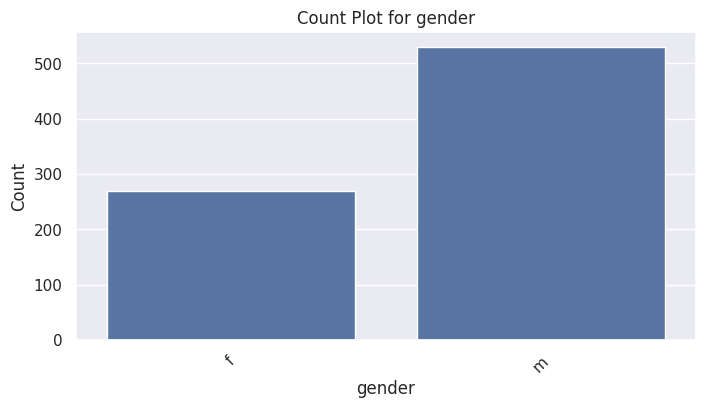

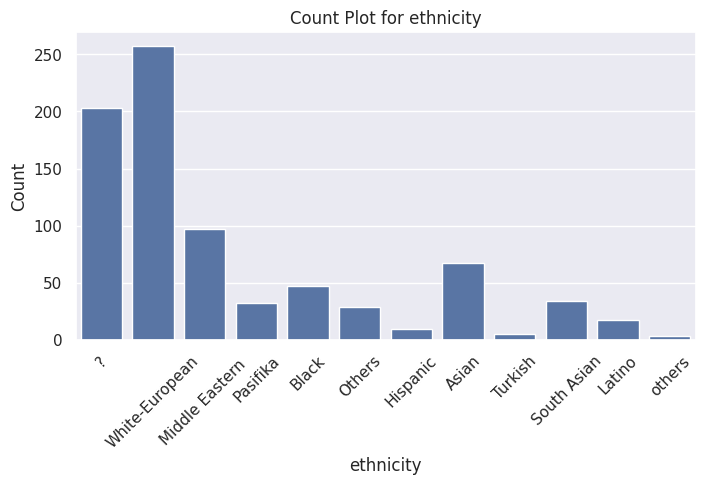

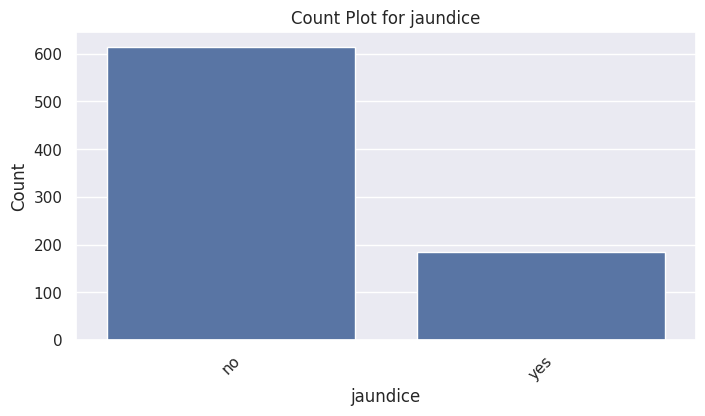

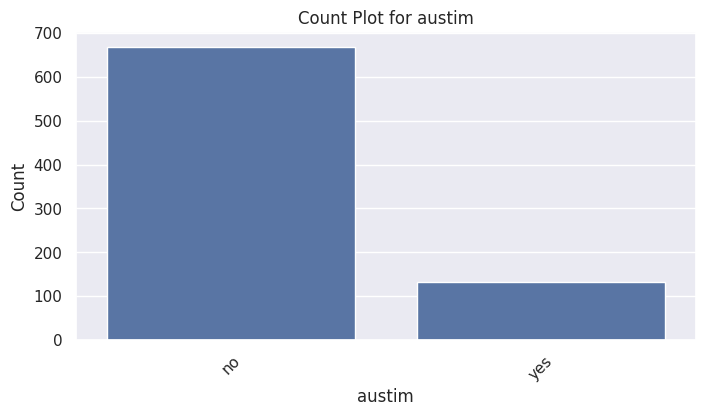

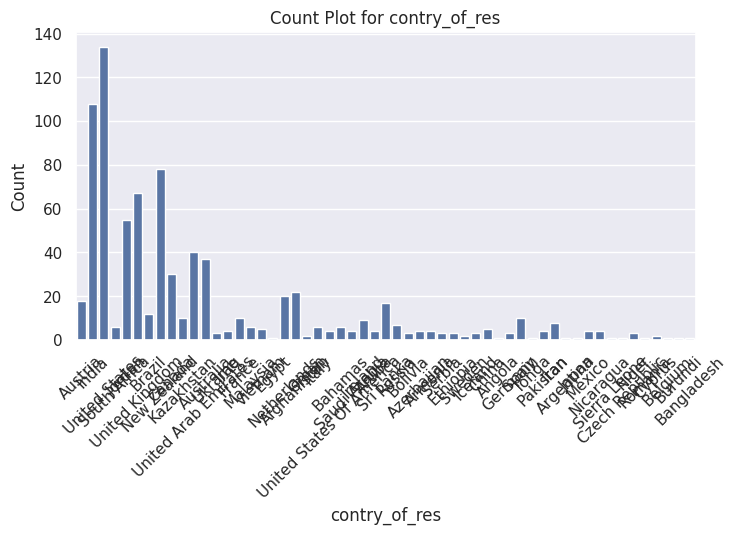

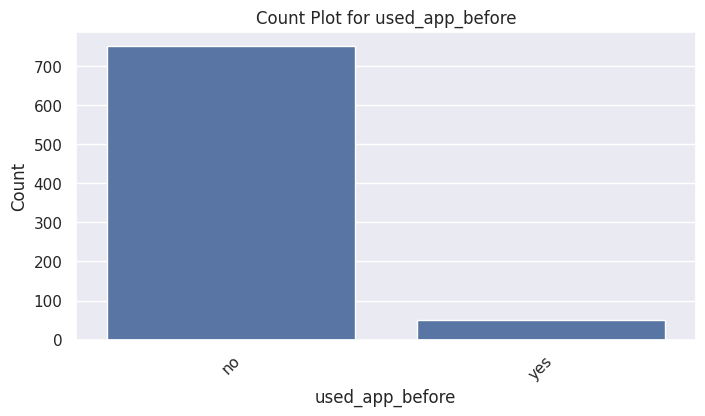

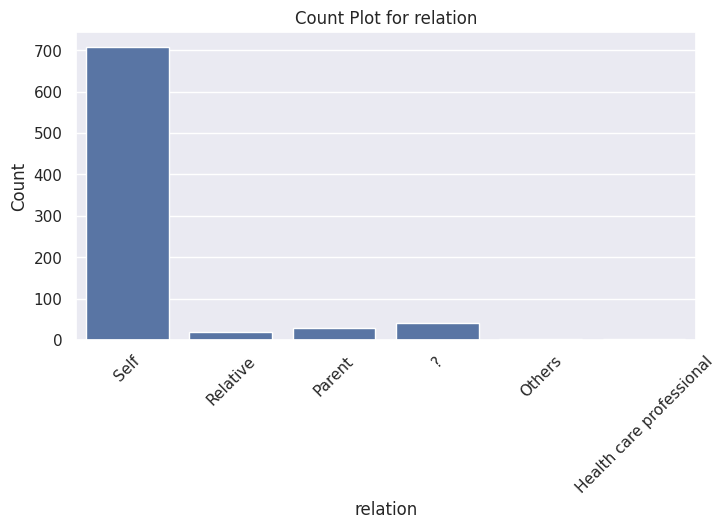

In [25]:
categorical_columns = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'relation']

for col in categorical_columns:
    plt.figure(figsize=(8, 4))  # Adjust figure size
    sns.countplot(x=df[col])
    plt.title(f"Count Plot for {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
    plt.yticks()  # Ensure y-axis ticks are visible
    plt.show()

### Target Column

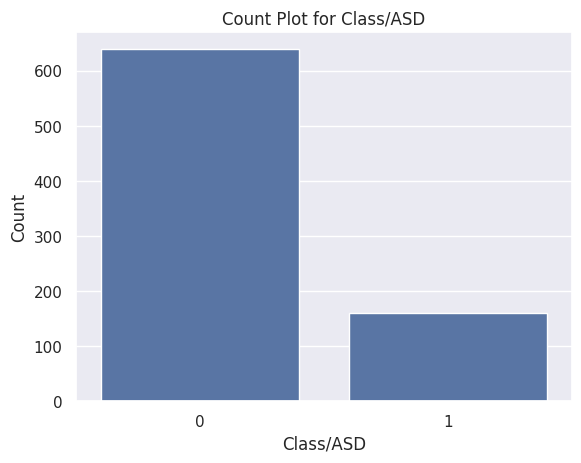

In [26]:
# countplot for target column (Class/ASD)
sns.countplot(x=df["Class/ASD"])
plt.title("Count Plot for Class/ASD")
plt.xlabel("Class/ASD")
plt.ylabel("Count")
plt.show()

In [27]:
#counting values in target column
df["Class/ASD"].value_counts()

,count
Class/ASD,
0,639
1,161


## Handle missing values in ethnicity and relation column

In [28]:
df["ethnicity"] = df["ethnicity"].replace({"?":"Others","others":"Others"})

In [29]:
df["relation"].unique()

array(['Self', 'Relative', 'Parent', '?', 'Others',
       'Health care professional'], dtype=object)

In [30]:
df["relation"] = df["relation"].replace(
    {"?": "Others",
     "Relative": "Others",
     "Parent": "Others",
     "Health care professional": "Others"}
)

## Label Encoding

In [31]:
# identify columns with "object" data type
object_columns = df.select_dtypes(include=["object"]).columns

print(object_columns)



Index(['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'relation'],
      dtype='object')


In [32]:
# initialize a dictionary to store the encoders
encoders = {}

# apply label encoding and store the encoders
for column in object_columns:
  label_encoder = LabelEncoder()
  df[column] = label_encoder.fit_transform(df[column])
  encoders[column] = label_encoder   # saving the encoder for this column


# save the encoders as a pickle file
with open("encoders.pkl", "wb") as f:
  pickle.dump(encoders, f)

In [33]:
encoders

{'gender': LabelEncoder(),
 'ethnicity': LabelEncoder(),
 'jaundice': LabelEncoder(),
 'austim': LabelEncoder(),
 'contry_of_res': LabelEncoder(),
 'used_app_before': LabelEncoder(),
 'relation': LabelEncoder()}

In [34]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38.172746,0,5,0,0,6,0,6.351166,1,0
1,0,0,0,0,0,0,0,0,0,0,47.750517,1,5,0,0,23,0,2.255185,1,0
2,1,1,1,1,1,1,1,1,1,1,7.380373,1,9,0,1,52,0,14.851484,1,1
3,0,0,0,0,0,0,0,0,0,0,23.561927,0,5,0,0,52,0,2.276617,1,0
4,0,0,0,0,0,0,0,0,0,0,43.205790,1,5,0,0,44,0,-4.777286,1,0


## Bivariate Analysis

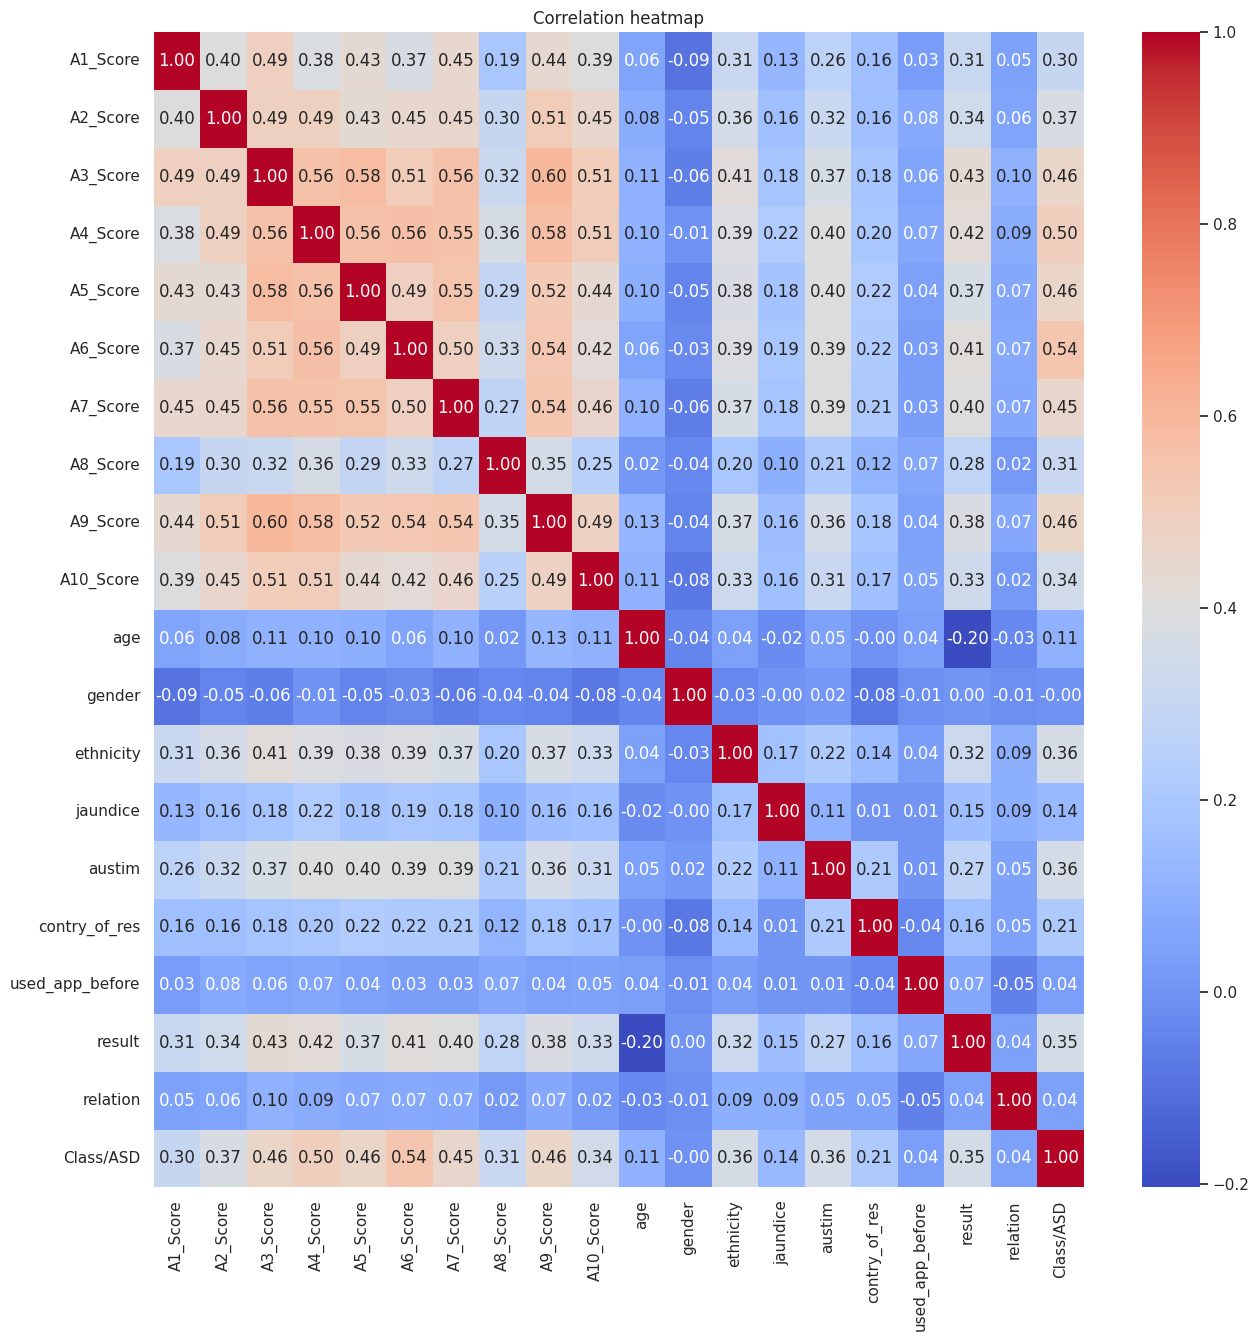

In [35]:
# correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation heatmap")
plt.show()


## **Insights from EDA:**

- There are few outliers in the numerical columns (age, results)
- There is a class imbalance in the target column
- There is a class imbalance in the categorical features
- We don't have any highly correlated column
- performed label encoding and saved the encoders

# Data Preprocessing

In [36]:
# function to replace the outliers with median
def replace_outliers_with_median(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  median = df[column].median()

  # replace outliers with median value
  df[column] = df[column].apply(lambda x: median if x < lower_bound or x > upper_bound else x)

  return df

In [37]:
# replace outliers in the "age" column
df = replace_outliers_with_median(df, "age")

In [38]:
# replace outliers in the "age" column
df = replace_outliers_with_median(df, "result")

In [39]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38.172746,0,5,0,0,6,0,6.351166,1,0
1,0,0,0,0,0,0,0,0,0,0,47.750517,1,5,0,0,23,0,2.255185,1,0
2,1,1,1,1,1,1,1,1,1,1,7.380373,1,9,0,1,52,0,14.851484,1,1
3,0,0,0,0,0,0,0,0,0,0,23.561927,0,5,0,0,52,0,2.276617,1,0
4,0,0,0,0,0,0,0,0,0,0,43.205790,1,5,0,0,44,0,-4.777286,1,0


# Splitting the data

In [40]:
# dropping target column from the dataframe and making a new df
X = df.drop(columns=["Class/ASD"])
y = df["Class/ASD"]

In [41]:
# splitting data in training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(y_train.shape)
print(y_test.shape)



(640,)
(160,)


In [42]:
y_train.value_counts()


,count
Class/ASD,
0,515
1,125


In [43]:

y_test.value_counts()

,count
Class/ASD,
0,124
1,36


# SMOTE (Synthetic Minority Oversampling technique)

In [44]:
smote = SMOTE(random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(y_train_smote.shape)

print(y_train_smote.value_counts())

(1030,)
Class/ASD
1    515
0    515
Name: count, dtype: int64


# Model Training

In [45]:
# dictionary of classifiers
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42)
}


In [46]:
# dictionary to store the cross validation results
cv_scores = {}

# perform 5-fold cross validation for each model
for model_name, model in models.items():
  print(f"Training {model_name} with default parameters...")
  scores = cross_val_score(model, X_train_smote, y_train_smote, cv=5, scoring="accuracy")
  cv_scores[model_name] = scores
  print(f"{model_name} Cross-Validation Accuracy: {np.mean(scores):.2f}")
  print("-"*50)

cv_scores

Training Decision Tree with default parameters...
Decision Tree Cross-Validation Accuracy: 0.86
--------------------------------------------------
Training Random Forest with default parameters...
Random Forest Cross-Validation Accuracy: 0.92
--------------------------------------------------
Training XGBoost with default parameters...
XGBoost Cross-Validation Accuracy: 0.90
--------------------------------------------------


{'Decision Tree': array([0.84951456, 0.83495146, 0.87864078, 0.88349515, 0.84466019]),
 'Random Forest': array([0.90776699, 0.93203883, 0.9223301 , 0.91747573, 0.90291262]),
 'XGBoost': array([0.86893204, 0.9223301 , 0.89805825, 0.91262136, 0.88834951])}

In [47]:
"""**6. Model Selection & Hyperparameter Tuning**"""

# Initializing models
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
xgboost_classifier = XGBClassifier(random_state=42)

# Hyperparameter grids for RandomizedSearchCV

param_grids = {
    "Decision Tree": {
        "criterion": ["gini", "entropy"],
        "max_depth": [None, 10, 20, 30, 50, 70],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4]
    },
    "Random Forest": {
        "n_estimators": [50, 100, 200, 500],
        "max_depth": [None, 10, 20, 30],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
        "bootstrap": [True, False]
    },
    "XGBoost": {
        "n_estimators": [50, 100, 200, 500],
        "max_depth": [3, 5, 7, 10],
        "learning_rate": [0.01, 0.1, 0.2, 0.3],
        "subsample": [0.5, 0.7, 1.0],
        "colsample_bytree": [0.5, 0.7, 1.0]
    }
}

best_models = {}
best_scores = {}

for model_name, model in models.items():
    print(f"Performing hyperparameter tuning for {model_name}...")

    random_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_grids[model_name],
        n_iter=20,
        cv=5,
        scoring="accuracy",
        random_state=42,
        n_jobs=-1
    )

    random_search.fit(X_train_smote, y_train_smote)

    best_models[model_name] = random_search.best_estimator_
    best_scores[model_name] = random_search.best_score_

    print(f"Best {model_name} Model: {best_models[model_name]}")
    print(f"Best Cross-Validation Accuracy: {best_scores[model_name]:.4f}")
    print("-" * 50)

# Select the best overall model
best_model_name = max(best_scores, key=best_scores.get)
best_model = best_models[best_model_name]
print(f"Best Overall Model: {best_model_name} with Accuracy: {best_scores[best_model_name]:.4f}")

# Save the best model
with open("best_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

print("Best model saved successfully!")

Performing hyperparameter tuning for Decision Tree...
Best Decision Tree Model: DecisionTreeClassifier(criterion='entropy', max_depth=30, random_state=42)
Best Cross-Validation Accuracy: 0.8689
--------------------------------------------------
Performing hyperparameter tuning for Random Forest...
Best Random Forest Model: RandomForestClassifier(bootstrap=False, max_depth=20, n_estimators=50,
                       random_state=42)
Best Cross-Validation Accuracy: 0.9214
--------------------------------------------------
Performing hyperparameter tuning for XGBoost...
Best XGBoost Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, 

# Model Evaluation

- Accuracy: The model achieved 80.63% accuracy, meaning it correctly predicts ASD/non-ASD in most cases.

- AUC Score: 0.89, indicating strong ability to distinguish between ASD and non-ASD cases.

- False Negatives: 16 ASD cases were misclassified as non-ASD, leading to a low recall (0.56) for ASD detection.

- False Positives: 15 non-ASD cases were incorrectly classified as ASD, which may impact diagnosis reliability.

- Class Performance:

  - Non-ASD (Class 0): High precision (0.87) and recall (0.88), meaning the model effectively identifies non-ASD individuals.

  - ASD (Class 1): Struggles with detection, as indicated by lower precision (0.57) and recall (0.56).

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.88      0.88       124
           1       0.57      0.56      0.56        36

    accuracy                           0.81       160
   macro avg       0.72      0.72      0.72       160
weighted avg       0.80      0.81      0.81       160



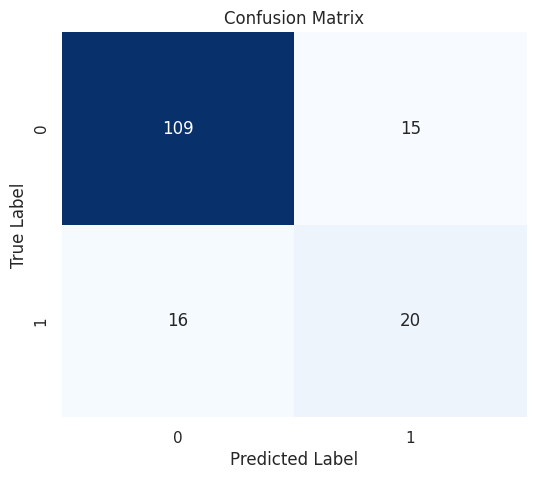

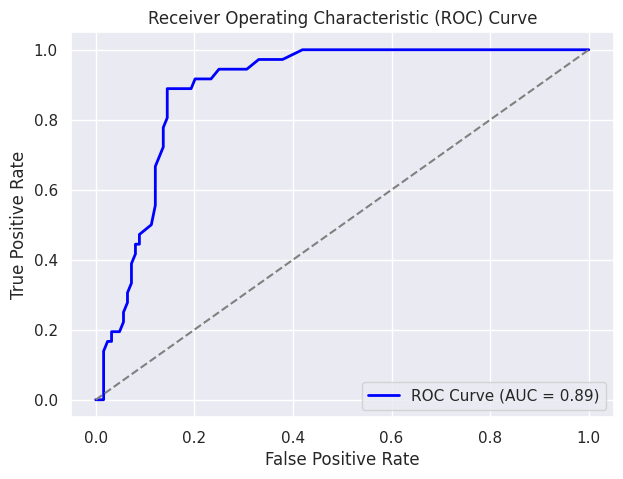

Model Accuracy: 0.8063
AUC Score: 0.8914


In [48]:
# Load the best saved model
with open("best_model.pkl", "rb") as f:
    best_model = pickle.load(f)

# Make predictions on the test set
y_pred = best_model.predict(X_test)
y_pred_prob = best_model.predict_proba(X_test)[:, 1]  # Probabilities for ROC Curve

# 1. Print Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# 2. Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# 3. ROC Curve & AUC Score
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

print(f"Model Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"AUC Score: {roc_auc:.4f}")


# Analyze Feature Importance

- Top Features:

  result is the most influential predictor, likely representing the ASD screening test score.

  A9_Score and A4_Score have high importance, indicating strong correlation with ASD.

  ethnicity, age, and country_of_res also play a significant role, suggesting demographic factors impact predictions.

- Less Important Features:

  used_app_before, jaundice, and autism (family history) contribute the least, meaning they have minimal impact on predictions.

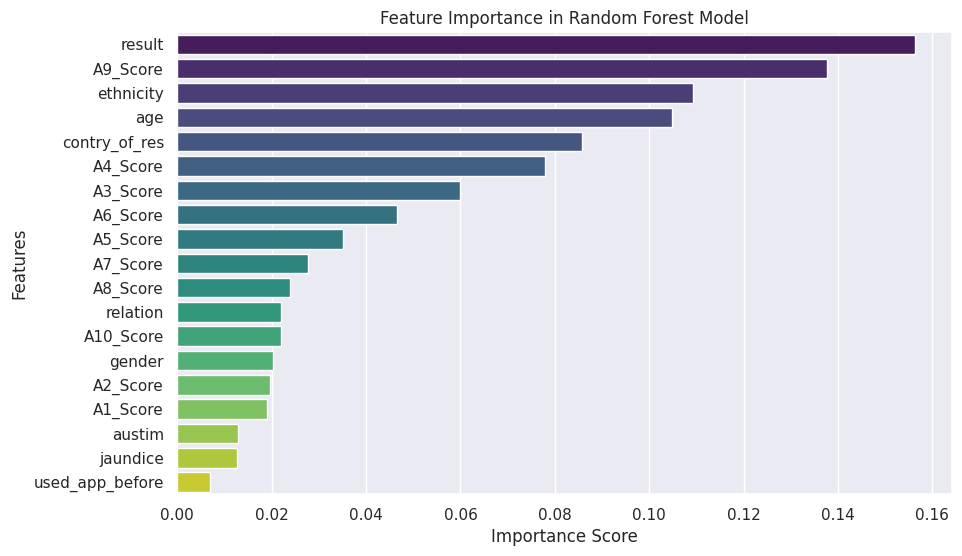

Feature Importance Scores:
             Feature  Importance
17           result    0.156382
8          A9_Score    0.137562
12        ethnicity    0.109228
10              age    0.104769
15    contry_of_res    0.085653
3          A4_Score    0.078012
2          A3_Score    0.059863
5          A6_Score    0.046476
4          A5_Score    0.035201
6          A7_Score    0.027670
7          A8_Score    0.023814
18         relation    0.022009
9         A10_Score    0.021993
11           gender    0.020265
1          A2_Score    0.019648
0          A1_Score    0.019023
14           austim    0.012889
13         jaundice    0.012694
16  used_app_before    0.006849


In [49]:
# Get feature importances from the best model
feature_importances = best_model.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    "Feature": X_train_smote.columns,
    "Importance": feature_importances
}).sort_values(by="Importance", ascending=False)

# Fix for Seaborn palette warning
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df, hue="Feature", palette="viridis", legend=False)
plt.title("Feature Importance in Random Forest Model")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

# Display feature importance values manually
print("Feature Importance Scores:\n", feature_importance_df)

